### Introduction:
We would use Ada Boost and Gradient Boost classiffiers

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support, accuracy_score
from sklearn.metrics import roc_curve, auc

In [4]:
data = pd.read_csv("./dataset/onlinefoods.csv")
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [8]:
data["Monthly Income"].value_counts()

Monthly Income
No Income          187
25001 to 50000      69
More than 50000     62
10001 to 25000      45
Below Rs.10000      25
Name: count, dtype: int64

Check the exploratory [notebook](./exploratory.ipynb) for the data exploration.

Let's label encode the categorical columns

In [37]:
data.drop(columns=["Pin code", "Unnamed: 12"], axis=1, inplace=True)
le = LabelEncoder()
dict_label_encoder = {} # We're gonna use this dict later to encode the input from the app
for i in [
    "Gender",
    "Marital Status",
    "Occupation",
    "Monthly Income",
    "Educational Qualifications",
    "Output",
    "Feedback",
]:
    data[i] = le.fit_transform(data[i])
    dict_label_encoder[i] = dict(zip(le.classes_, le.transform(le.classes_)))

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    int32  
 2   Marital Status              388 non-null    int32  
 3   Occupation                  388 non-null    int32  
 4   Monthly Income              388 non-null    int32  
 5   Educational Qualifications  388 non-null    int32  
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Output                      388 non-null    int32  
 10  Feedback                    388 non-null    int32  
dtypes: float64(2), int32(7), int64(2)
memory usage: 22.9 KB


In [38]:
data.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Output,Feedback
0,20,0,2,3,4,2,4,12.9766,77.5993,1,1
1,24,0,2,3,2,0,3,12.9770,77.5773,1,1
2,22,1,2,3,2,2,3,12.9551,77.6593,1,0
3,22,0,2,3,4,0,6,12.9473,77.5616,1,1
4,22,1,2,3,2,2,4,12.9850,77.5533,1,1


In [39]:
data.describe()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Output,Feedback
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,0.572165,1.412371,1.902062,2.713918,1.069588,3.280928,12.972058,77.600160,0.775773,0.817010
std,2.975593,0.495404,0.895035,1.329722,1.491790,1.035695,1.351025,0.044489,0.051354,0.417611,0.387157
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.865200,77.484200,0.000000,0.000000
25%,23.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,12.936900,77.565275,1.000000,1.000000
50%,24.000000,1.000000,2.000000,3.000000,3.000000,1.000000,3.000000,12.977000,77.592100,1.000000,1.000000
75%,26.000000,1.000000,2.000000,3.000000,4.000000,2.000000,4.000000,12.997025,77.630900,1.000000,1.000000
max,33.000000,1.000000,2.000000,3.000000,4.000000,4.000000,6.000000,13.102000,77.758200,1.000000,1.000000


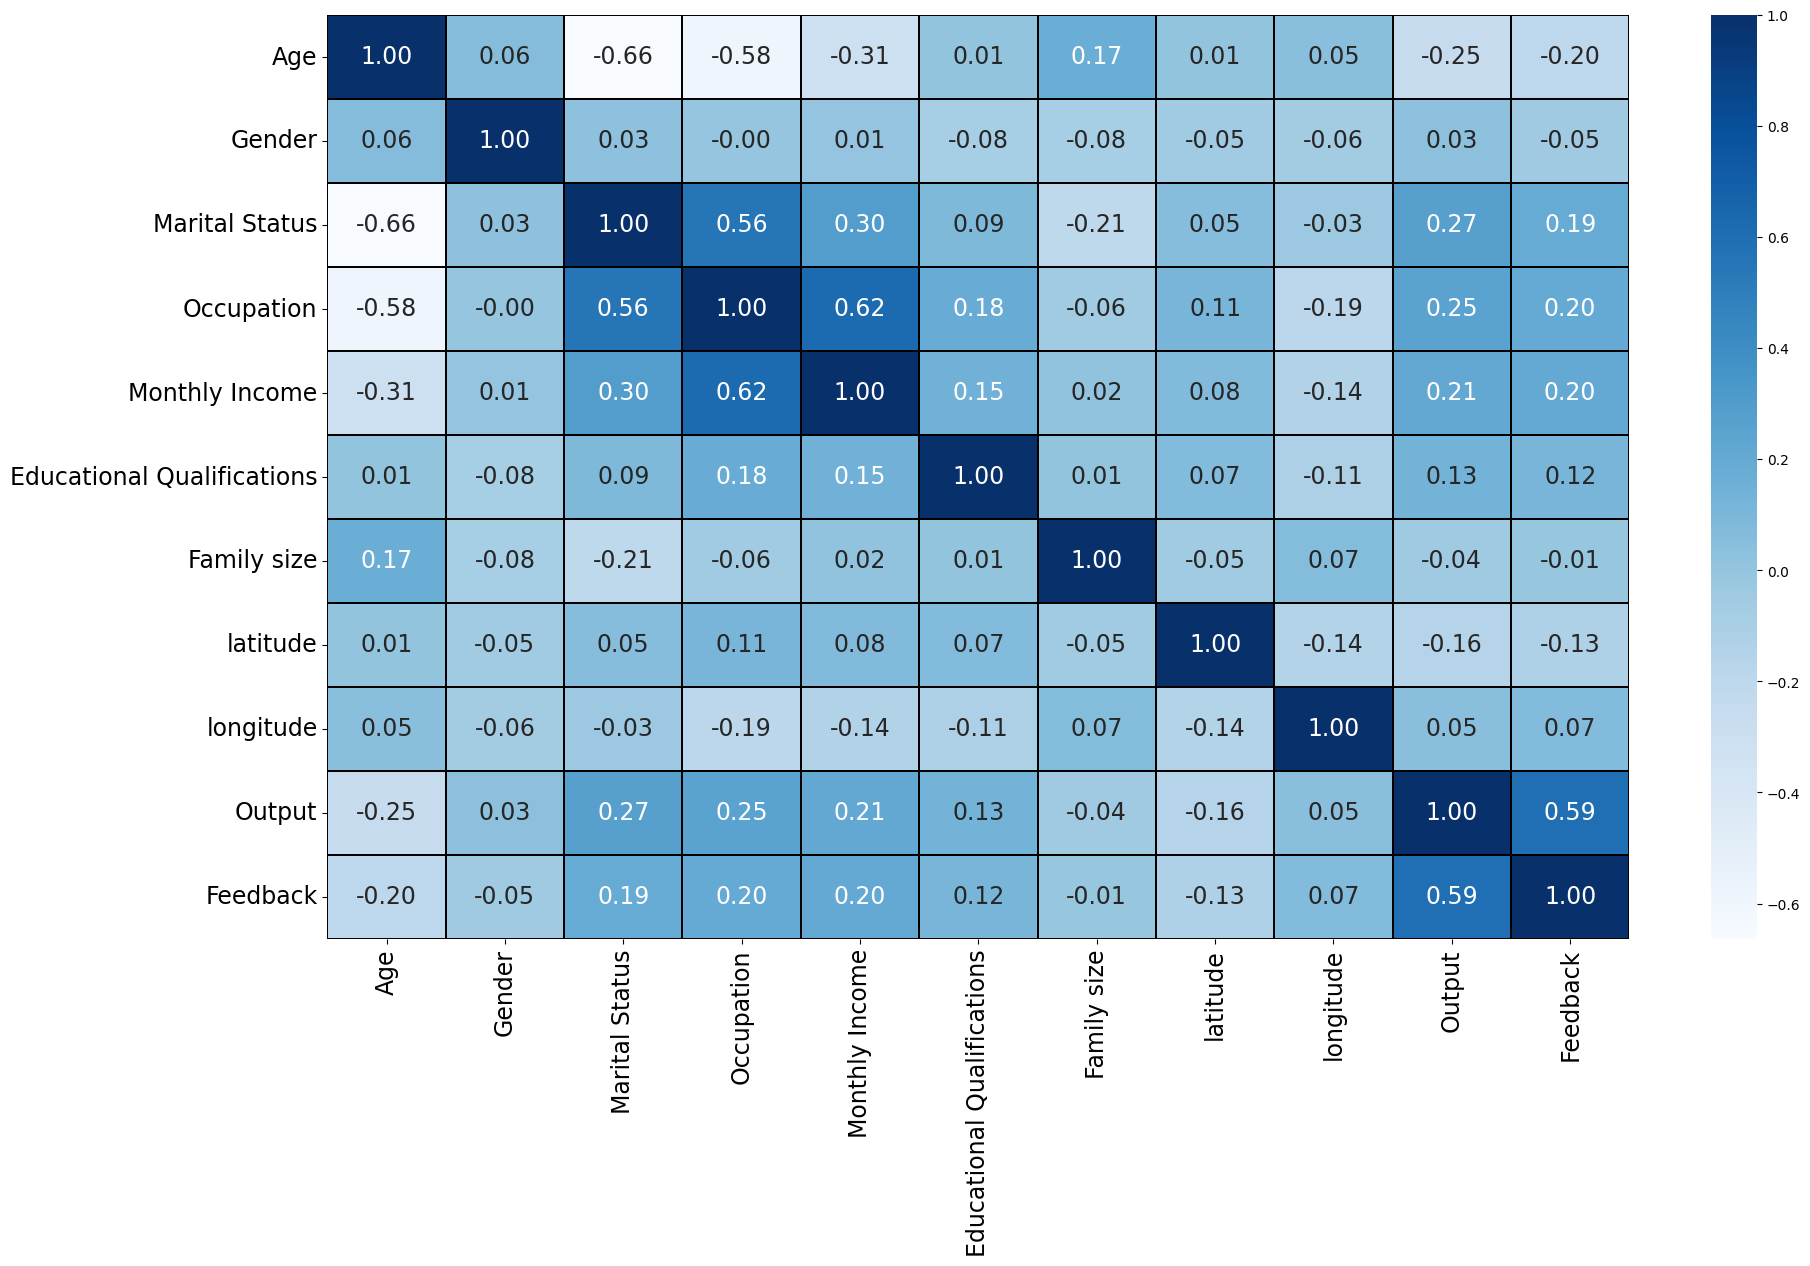

In [40]:
# Let's inspect the data for correlation between the features.
plt.figure(figsize=(21, 12))
sns.heatmap(
    data.corr(),
    annot=True,
    fmt="0.2f",
    linecolor="black",
    linewidths="0.01",
    cmap="Blues",
    annot_kws={"fontsize": 17},
)
plt.yticks(fontsize=17, rotation=0)
plt.xticks(fontsize=17, rotation=90)
plt.show()

### Let's split the data into train and test

In [41]:
X = data.drop(columns=["Feedback"], axis=1)
y = data["Feedback"].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=123
)

Let's scale the data using StandardScaler.

In [42]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)
X_test

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Output
199,23,0,2,3,4,0,2,13.0298,77.6047,0
168,25,1,0,2,3,3,2,13.0626,77.5284,1
161,26,1,2,0,3,2,3,12.9337,77.5900,0
225,28,1,2,2,0,2,2,12.9149,77.5635,1
318,21,1,2,3,4,0,5,12.9783,77.6408,1
...,...,...,...,...,...,...,...,...,...,...
4,22,1,2,3,2,2,4,12.9850,77.5533,1
301,22,0,2,3,4,0,6,12.9473,77.5616,1
1,24,0,2,3,2,0,3,12.9770,77.5773,1
364,29,1,2,0,1,0,3,13.0641,77.5931,0


Let's write functions to evaluate the model.

In [13]:
def model_evaluate(yt, yp):
    metrics = {}
    metrics["accuracy"] = accuracy_score(yt, yp)
    metrics["precision"], metrics["recall"], metrics["fscore"], _ = (
        precision_recall_fscore_support(yt, yp, average="weighted")
    )

    metrics_names = list(metrics.keys())
    metrics_values = list(metrics.values())

    ax = sns.barplot(x=metrics_names, y=metrics_values, palette="viridis")
    plt.title("Model Evaluation metrics")
    plt.ylim(0, 1)
    plt.ylabel("Value")

    for i, v in enumerate(metrics_values):
        ax.text(
            i, v / 2, f"{v:.2f}", ha="center", va="center", color="white", fontsize=12
        )
    plt.show()


def class_report(yt, yp):
    cr = pd.DataFrame(classification_report(yt, yp, output_dict=True))
    return cr.T.style.background_gradient(axis=0, cmap="Blues")


def conf_matrix(yt, yp):
    cm = confusion_matrix(yt, yp)
    sns.heatmap(
        cm, annot=True, fmt="0.2f", linecolor="black", linewidths="0.02", cmap="Blues"
    )
    plt.title("Confusion Matrix")
    plt.ylabel("Actual Class")
    plt.xlabel("Predicted Class")
    plt.show()


def plot_roc(yt, yp):
    fpr, tpr, thr = roc_curve(yt, yp)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 6))
    plt.plot(
        fpr, tpr, color="darkorange", lw=2, label=f"roc_curve (area = {roc_auc : 0.3f})"
    )
    plt.plot([0.0, 1.0], [0.0, 1.0], color="navy", lw=2, linestyle="--")
    plt.xlim([-0.01, 1.05])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC CURVE")
    plt.legend(loc="lower right")
    plt.show()

### Gradient Boosting Classifier:

In [17]:
from sklearn.ensemble import GradientBoostingClassifier


gbc = GradientBoostingClassifier()

params_grid = {
    "n_estimators": [20 * n for n in range(1, 21)],
    "learning_rate": [0.1, 0.01, 0.001, 0.0001],
    "subsample": [1.0, 0.5],
    "max_features": [1, 2, 3, 4, 5],
}

grid_search = GridSearchCV(
    estimator=gbc, param_grid=params_grid, cv=5, scoring="accuracy", n_jobs=-1
)
grid_search.fit(X_train, y_train.values.ravel())

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Parameters: {'learning_rate': 0.1, 'max_features': 5, 'n_estimators': 380, 'subsample': 0.5}
Best Score: 0.8612903225806452


In [18]:
grid_search.best_estimator_

GradientBoostingClassifier(max_features=5, n_estimators=380, subsample=0.5)

In [19]:
y_pred = grid_search.predict(X_test)
y_pred_prob = grid_search.predict_proba(X_test)
class_report(y_test, y_pred)

,precision,recall,f1-score,support
0,0.777778,0.500000,0.608696,14.000000
1,0.898551,0.968750,0.932331,64.000000
accuracy,0.884615,0.884615,0.884615,0.884615
macro avg,0.838164,0.734375,0.770513,78.000000
weighted avg,0.876874,0.884615,0.874242,78.000000


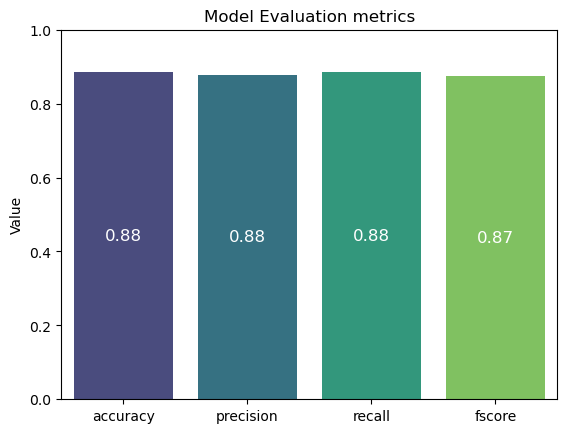

In [20]:
model_evaluate(y_test, y_pred)

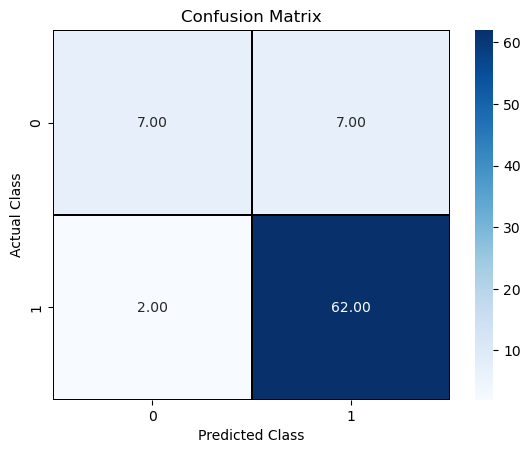

In [21]:
conf_matrix(y_test, y_pred)

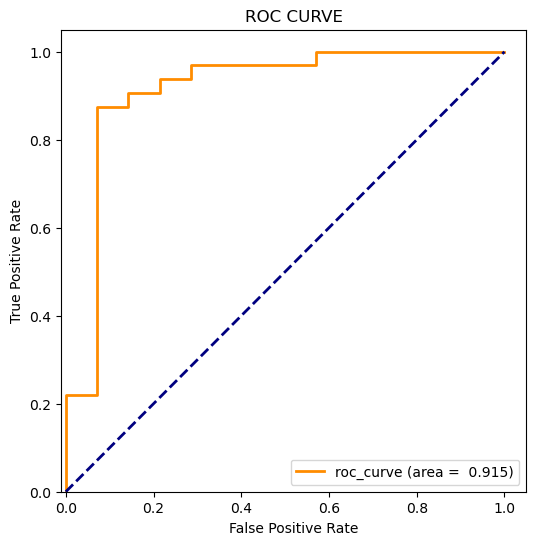

In [24]:
plot_roc(y_test, y_pred_prob[:,1])

### Ada Boosting Classifier:

In [25]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

abc = AdaBoostClassifier(DecisionTreeClassifier(random_state = 12))

params_grid = {
    'n_estimators' : [20 * n for n in range(1,21)],
    'learning_rate' : [0.1, 0.01, 0.001, 0.0001],
    'estimator__criterion' : ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator = abc, param_grid = params_grid, cv=5,
                          scoring = 'accuracy', n_jobs = -1)

grid_search.fit(X_train, y_train.values.ravel())
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Parameters: {'estimator__criterion': 'gini', 'learning_rate': 0.1, 'n_estimators': 180}
Best Score: 0.8451612903225806


In [26]:
grid_search.best_estimator_

AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=12),
                   learning_rate=0.1, n_estimators=180)

In [27]:
y_pred = grid_search.predict(X_test)
y_pred_prob = grid_search.predict_proba(X_test)
class_report(y_test, y_pred)

,precision,recall,f1-score,support
0,0.750000,0.642857,0.692308,14.000000
1,0.924242,0.953125,0.938462,64.000000
accuracy,0.897436,0.897436,0.897436,0.897436
macro avg,0.837121,0.797991,0.815385,78.000000
weighted avg,0.892968,0.897436,0.894280,78.000000


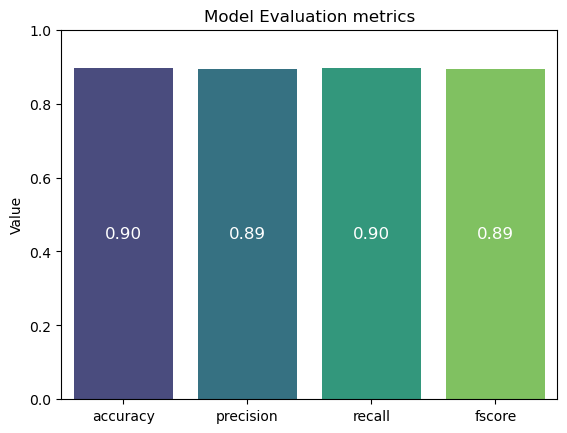

In [28]:
model_evaluate(y_test, y_pred)

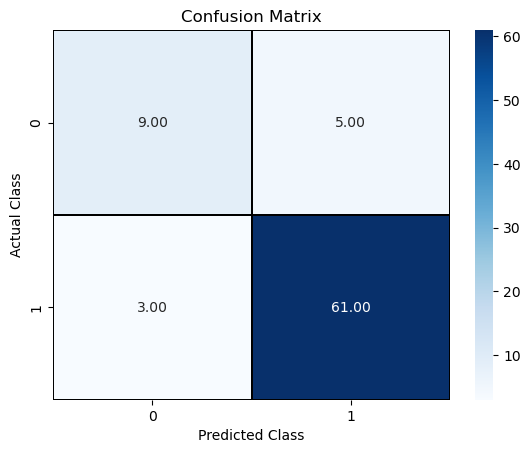

In [29]:
conf_matrix(y_test, y_pred)

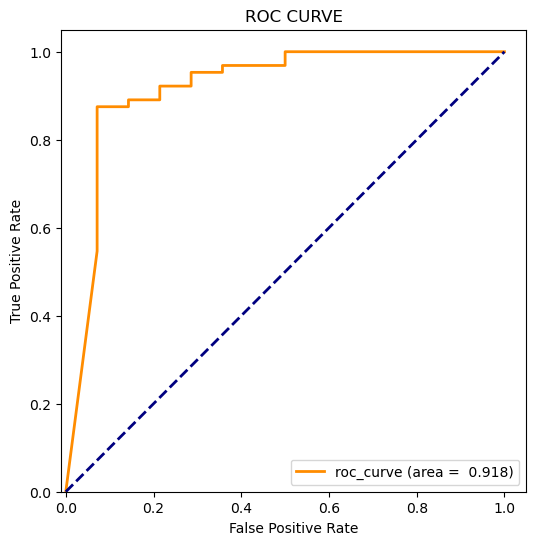

In [30]:
plot_roc(y_test, y_pred_prob[:,1])

### Conclusion:
Which performs better? Which would we use?

Adaboost does better so we'd store it and use for the app.

In [31]:
# Save the best estimator, the scaller and encoder as pickle files
import pickle

with open("./model/model.pkl", "wb") as f:
    pickle.dump(grid_search.best_estimator_, f)

class_report(y_test, y_pred).to_html("./model/model_report.html")

with open("./model/std_scaler.pkl", "wb") as f:
    pickle.dump(std_scaler, f)

with open("./model/label_encoder_dict.pkl", "wb") as f:
    pickle.dump(dict_label_encoder, f)